<a href="https://colab.research.google.com/github/Bruno-csr/Predict_Online_Course_Engagement/blob/main/Predict_Online_Course_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Documentação
> * https://scikit-learn.org/stable/modules/svm.html#classification
> * https://scikit-learn.org/stable/supervised_learning.html


*   LinearSVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
*   




#Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Tratamento e importação de dados

About this file

1. **UserID:** Unique identifier for each use
2. **CourseCategory:** Category of the course taken by the user (e.g., Programming, Business, Arts)
3. **TimeSpentOnCourse**: Total time spent by the user on the course in hours
4. **NumberOfVideosWatched**: Total number of videos watched by the user
5. **NumberOfQuizzesTaken**: Total number of quizzes taken by the user
6. **QuizScores**: Average scores achieved by the user in quizzes (percentage)
7. **CompletionRate**: Percentage of course content completed by the user
8. **DeviceType**: Type of device used by the user (e.g., Desktop, Mobile)
9. **CourseCompletion** (Target Variable): Course completion status (0: Not Completed, 1: Completed)

In [2]:
uri = "https://raw.githubusercontent.com/Bruno-csr/Predict_Online_Course_Engagement/main/online_course_engagement_data.csv"
dados = pd.read_csv(uri)
dados.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [3]:
a_renomear = {
    'UserID' : 'Usuario',
    'CourseCategory' : 'Tipo',
    'TimeSpentOnCourse' : 'Tempo_Gasto',
    'NumberOfVideosWatched' : 'Videos_assistidos',
    'NumberOfQuizzesTaken' : 'Provas_feitas',
    'QuizScores' : 'Notas_Provas',
    'CompletionRate' : 'Taxa_conclusao',
    'DeviceType' : 'Dispositivo',
    'CourseCompletion' : 'Curso_concluido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Usuario,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


  Troca e ID para tipo de curso

  1. Health: Saude
  2. Programming: Programacao,
  3. Arts: Artes,
  4. Science: Ciencias,
  5. Business: Negocios

In [4]:
a_trocar = {
    'Health': 1,
    'Programming': 2,
    'Arts': 3,
    'Science': 4,
    'Business': 5
}
dados.Tipo = dados.Tipo.map(a_trocar)
dados.head()

,Usuario,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,5618,1,29.979719,17,3,50.365656,20.860773,1,0
1,4326,3,27.802640,1,5,62.615970,65.632415,1,0
2,5849,3,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,2,92.490647,16,0,98.428285,18.102478,0,0


In [5]:
dados = dados.drop(columns = 'Usuario', axis=1)
dados.head()

,Tipo,Tempo_Gasto,Videos_assistidos,Provas_feitas,Notas_Provas,Taxa_conclusao,Dispositivo,Curso_concluido
0,1,29.979719,17,3,50.365656,20.860773,1,0
1,3,27.802640,1,5,62.615970,65.632415,1,0
2,3,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,2,92.490647,16,0,98.428285,18.102478,0,0


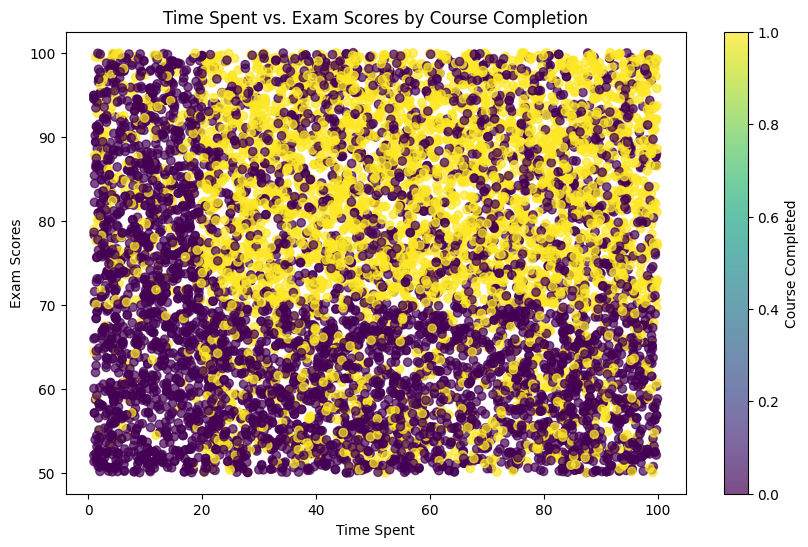

In [13]:
# @title Time Spent vs. Exam Scores by Course Completion

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dados['Tempo_Gasto'], dados['Notas_Provas'], c=dados['Curso_concluido'], cmap='viridis', alpha=0.7)
plt.xlabel('Time Spent')
plt.ylabel('Exam Scores')
plt.title('Time Spent vs. Exam Scores by Course Completion')
_ = plt.colorbar(label='Course Completed')

Insights:
As pessoas que gastam mais de 20 horas e tem uma média acima de 70 pontos nas provas, tem uma taxa de conclusão maior de cursos

#Definindo variáveis de treino

In [14]:
x = dados[['Tipo', 'Tempo_Gasto', 'Videos_assistidos', 'Provas_feitas', 'Notas_Provas', 'Taxa_conclusao', 'Dispositivo']]
y = dados['Curso_concluido']

In [15]:
#Definindo a base de teste estratificada com 75% para treino e 25% para teste

SEED = 5 #Inclusão de seed para que o treino ocorra sempre com os mesmos testes (Não random)
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.15,
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7650 elementos e testaremos com 1350 elementos


#Algorítimos

##DummyClassifier

In [10]:
#Criando a BaseLine com um algorítimo básico

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)
print(SEED)

A acurácia do dummy stratified foi 60.37%
5


##LinearSVC

In [11]:
#Acurácia usando uma regressão linear

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC(max_iter=1000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 76.52%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
